# Pipe Line Demo

## Import libraries

In [1]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.ndimage.measurements import label
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import pickle
% matplotlib inline

## Load utility funcitons

In [2]:
from lib import *
import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

def get_image_files():
    car_path = "./data/vehicles/"
    not_car_path = "./data/non-vehicles/"

    car_files = glob.glob(car_path + '/**/*.png', recursive=True)
    y_car = np.ones(len(car_files), dtype=np.int)
    not_car_files = glob.glob(not_car_path + '/**/*.png', recursive=True)
    y_not_car = np.zeros(len(not_car_files), dtype=np.int)

    X = np.concatenate([car_files, not_car_files])
    y = np.concatenate([y_car, y_not_car])
    X_names, y = shuffle(X, y)
    return X_names, y

X_names, y = get_image_files()

/home/liangyuan/anaconda2/envs/idp3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load test image

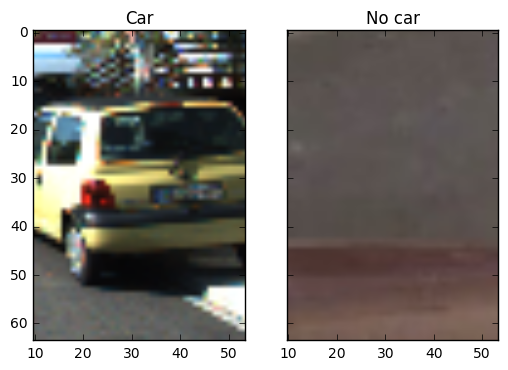

In [3]:
car = cv2.imread("./test_images/car.png")
car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)
nocar = cv2.imread("./test_images/nocar.png")
nocar = cv2.cvtColor(nocar, cv2.COLOR_BGR2RGB)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(car)
ax1.set_title("Car")
ax2.imshow(nocar)
ax2.set_title("No car")

## Color features

We would like to compare color dispersions in different color space

In [4]:
def hist_feature_plot(hist_features, title="Histogram for each channel"):
    hist = hist_features.reshape((3, -1))
    f, (ax1, ax2, ax3) = plt.subplots(3, 1)
    ax1.bar(range(len(hist[0])), hist[0])
    ax2.bar(range(len(hist[1])), hist[1])
    ax3.bar(range(len(hist[2])), hist[2])
    f.suptitle(title)
    return (ax1, ax2, ax3)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f45ebe5dac8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f45eba27198>)

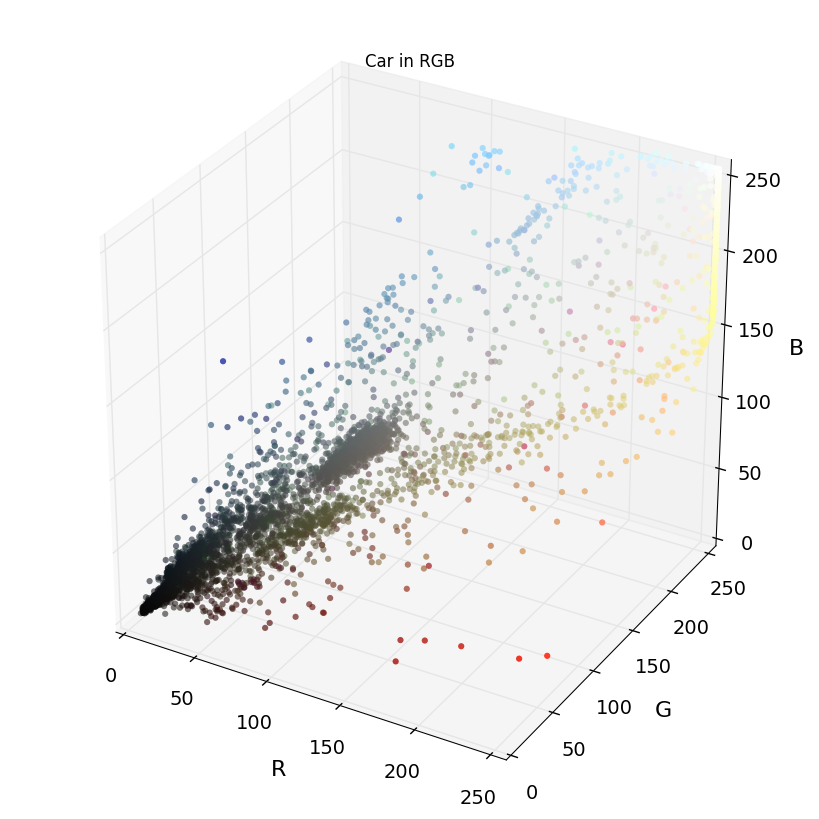

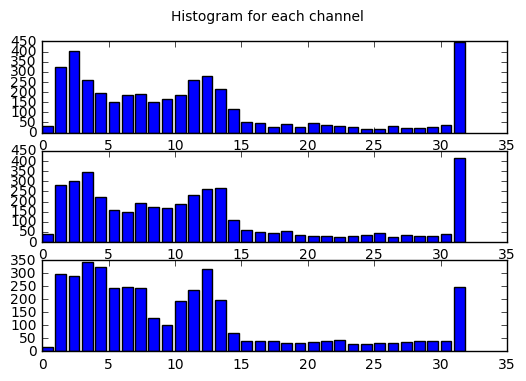

In [5]:
# Car color in RGB
plot3d(car)
plt.title("Car in RGB")
hist_features = color_hist(car)
hist_feature_plot(hist_features)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f45eb677e80>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f45eb636c50>)

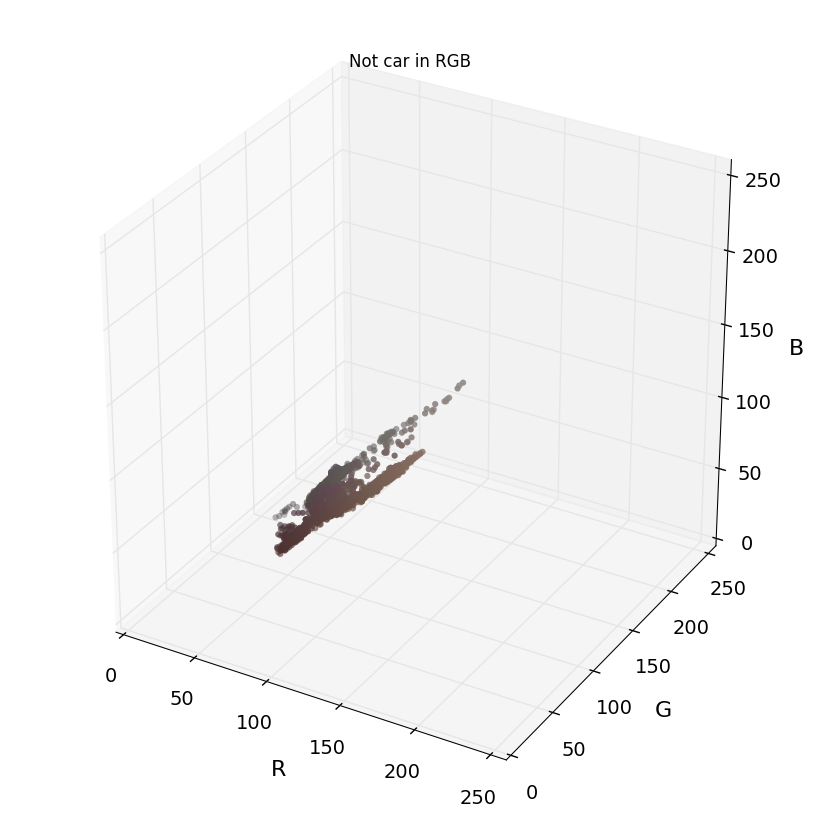

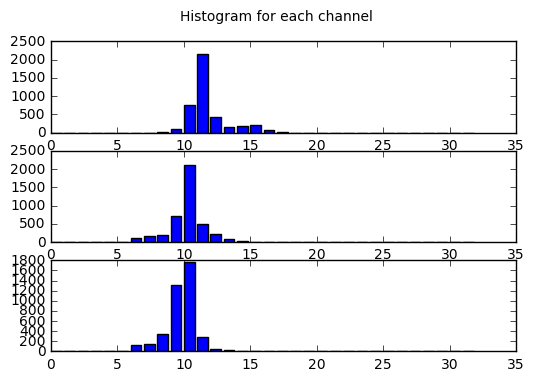

In [6]:
# No car color in RGB
plot3d(nocar)
plt.title("Not car in RGB")
hist_features = color_hist(nocar)
hist_feature_plot(hist_features)

Compare color dispersion in HSV

(<matplotlib.axes._subplots.AxesSubplot at 0x7f45eb1ec5f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f45eb9f4978>)

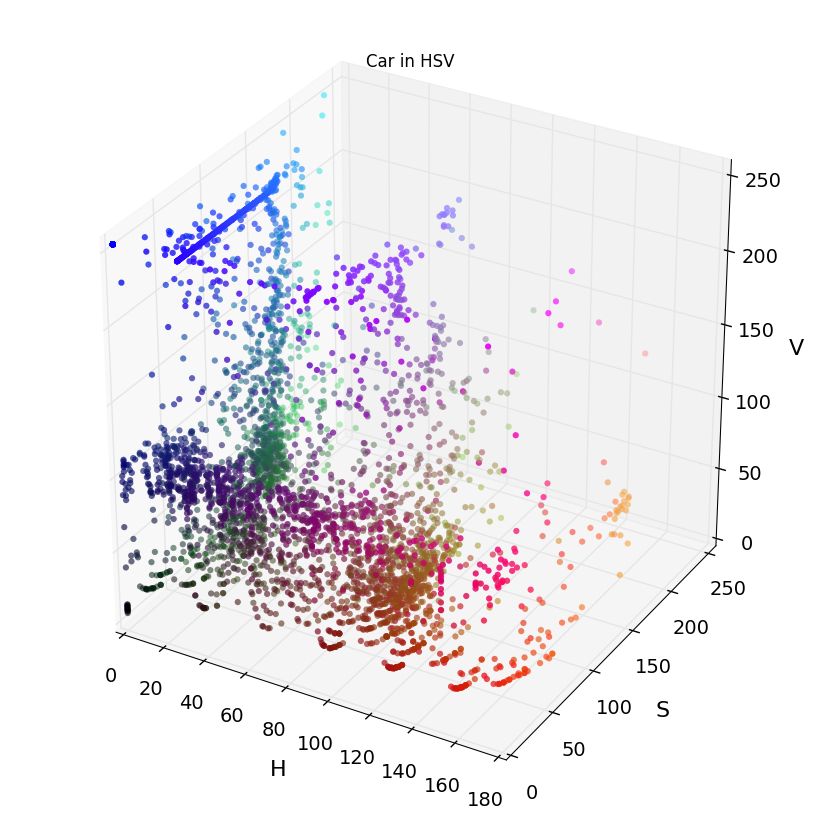

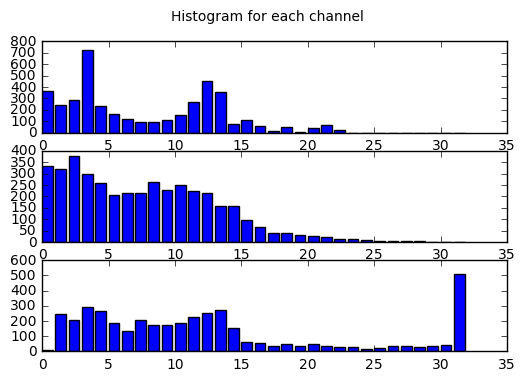

In [7]:
# Car color in HSV
car_HSV = cv2.cvtColor(car, cv2.COLOR_RGB2HSV)
plot3d(car_HSV, "HSV")
plt.title("Car in HSV")
hist_features = color_hist(car_HSV)
hist_feature_plot(hist_features)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f45e89b55f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f45e896de10>)

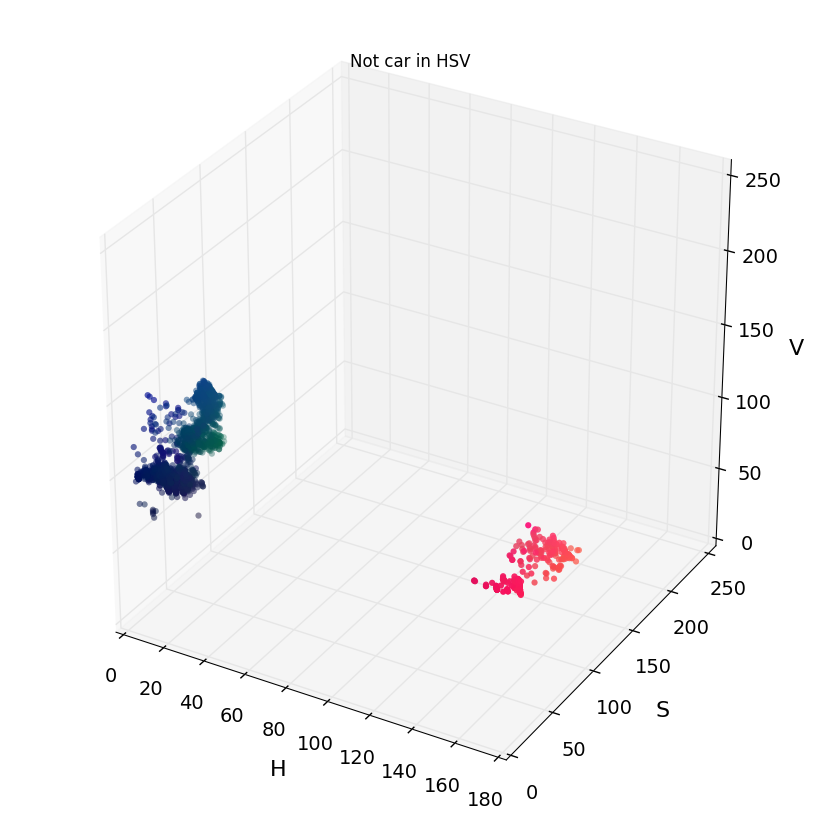

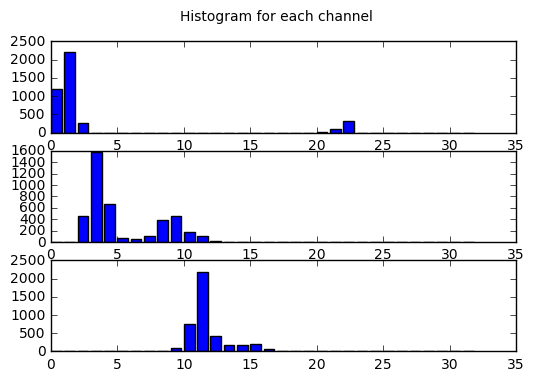

In [8]:
# No car color in HSV
nocar_HSV = cv2.cvtColor(nocar, cv2.COLOR_RGB2HSV)
plot3d(nocar_HSV, "HSV")
plt.title("Not car in HSV")
hist_features = color_hist(nocar_HSV)
hist_feature_plot(hist_features)

Compare color dispersion in HLS

(<matplotlib.axes._subplots.AxesSubplot at 0x7f45eb223198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f45e8724e80>)

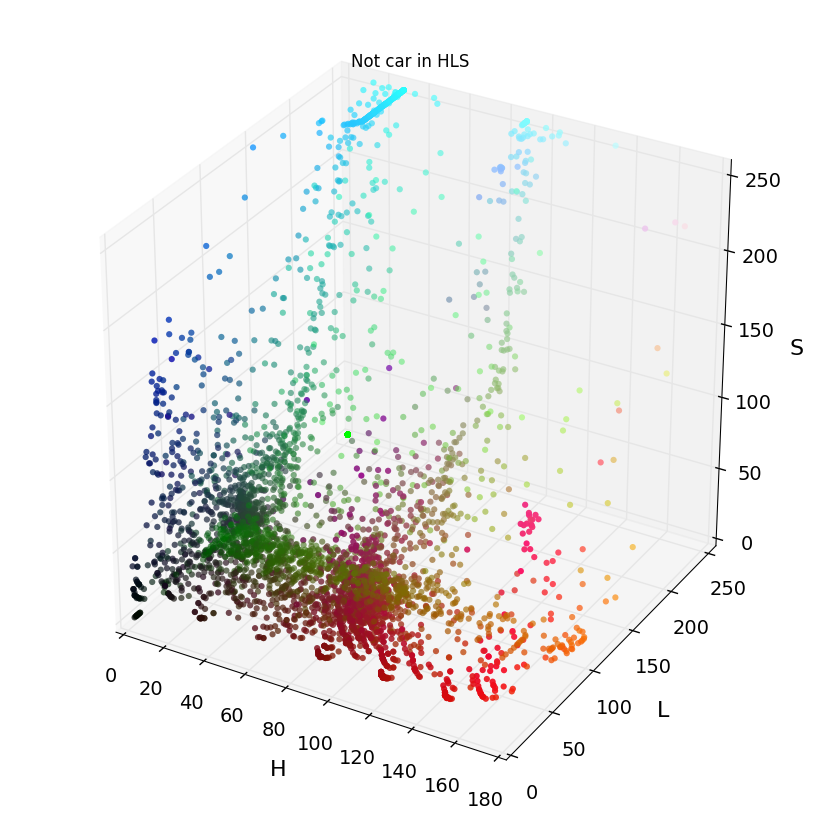

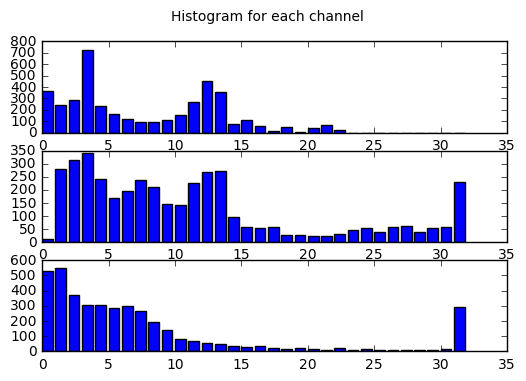

In [9]:
# Car color in HLS
car_HLS = cv2.cvtColor(car, cv2.COLOR_RGB2HLS)
plot3d(car_HLS, "HLS")
plt.title("Not car in HLS")
hist_features = color_hist(car_HLS)
hist_feature_plot(hist_features)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f45e838c5f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f45e83d5320>)

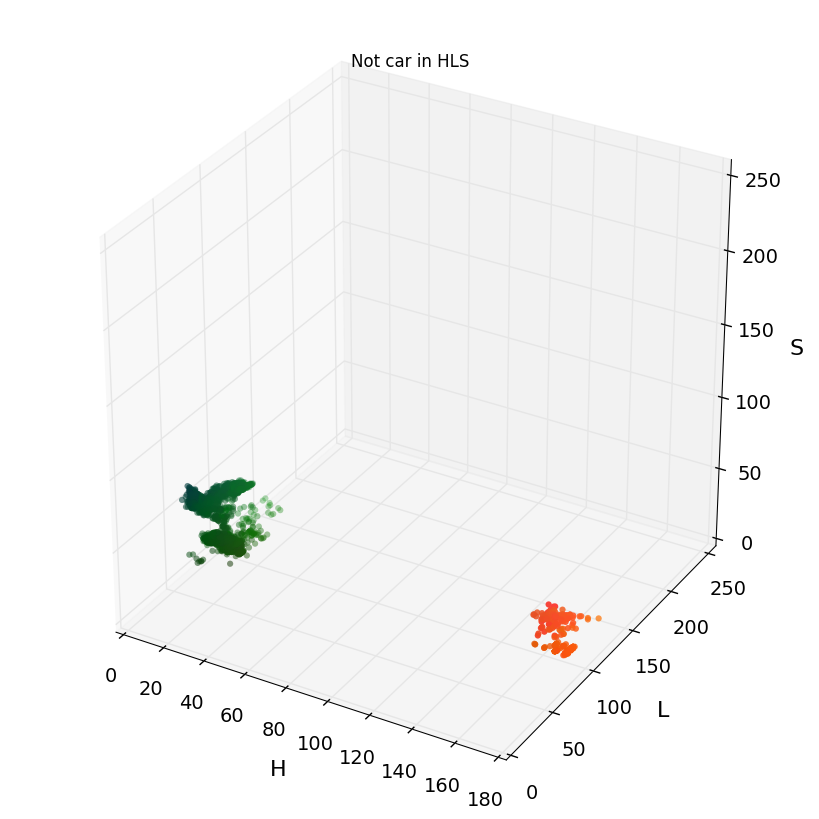

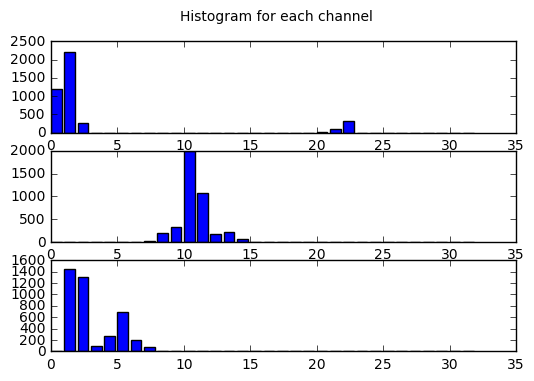

In [10]:
# NoCar color in HLS
nocar_HSL = cv2.cvtColor(nocar, cv2.COLOR_RGB2HLS)
plot3d(nocar_HSL, "HLS")
plt.title("Not car in HLS")
hist_features = color_hist(nocar_HSL)
hist_feature_plot(hist_features)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f45e81ce550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f45e8215ba8>)

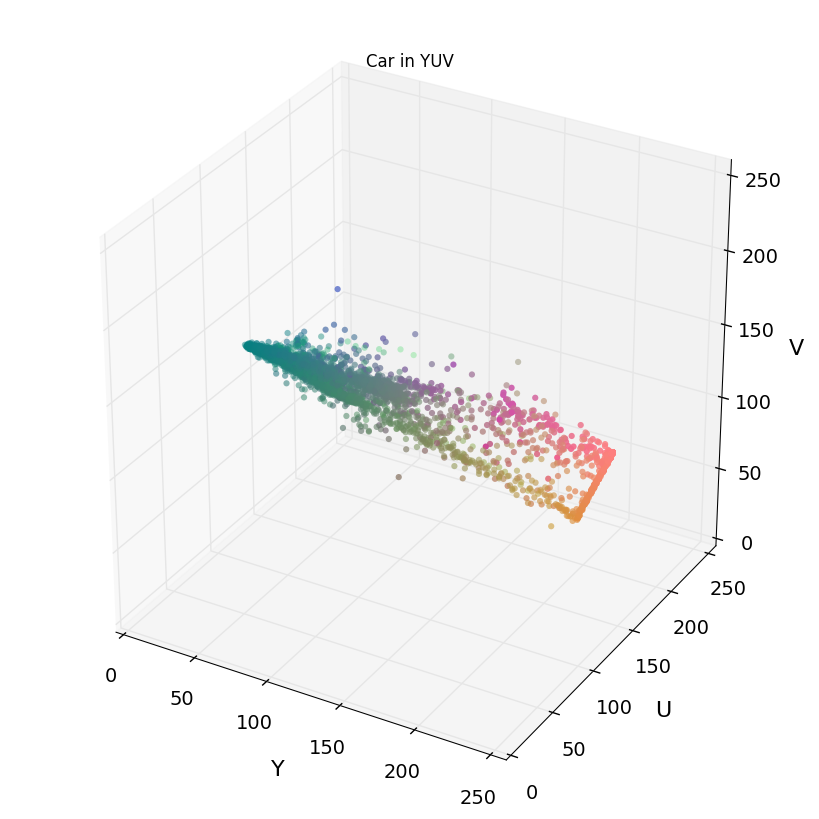

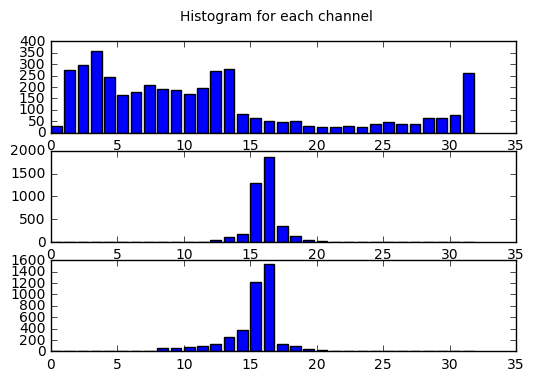

In [11]:
# Car color in YUV
car_YUV = cv2.cvtColor(car, cv2.COLOR_RGB2YUV)
plot3d(car_YUV, "YUV")
plt.title("Car in YUV")
hist_features = color_hist(car_YUV)
hist_feature_plot(hist_features)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f45e86a4a20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f45e82b1470>)

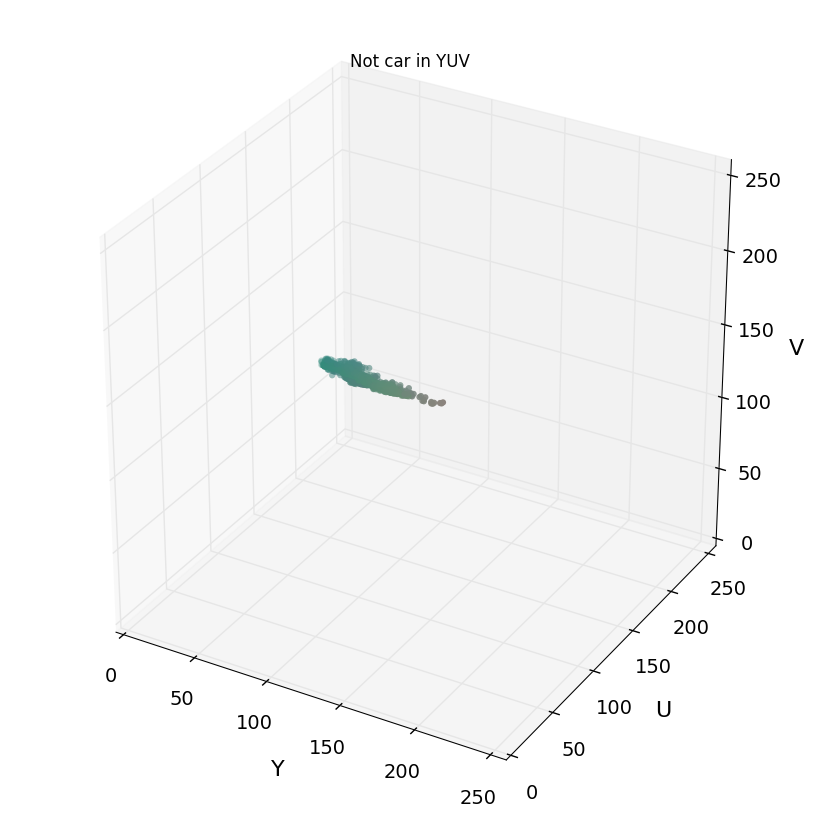

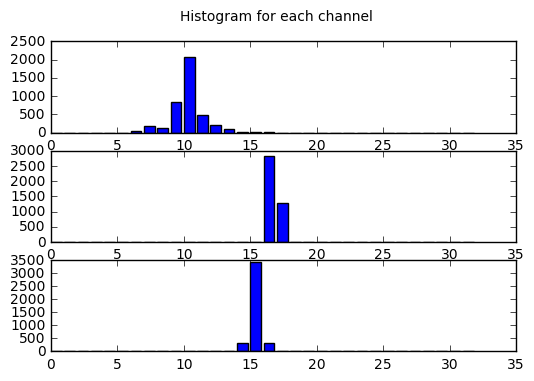

In [12]:
# No Car color in YUV
nocar_YUV = cv2.cvtColor(nocar, cv2.COLOR_RGB2YUV)
plot3d(nocar_YUV, "YUV")
plt.title("Not car in YUV")
hist_features = color_hist(nocar_YUV)
hist_feature_plot(hist_features)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f45e7d31048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f45e7ce9780>)

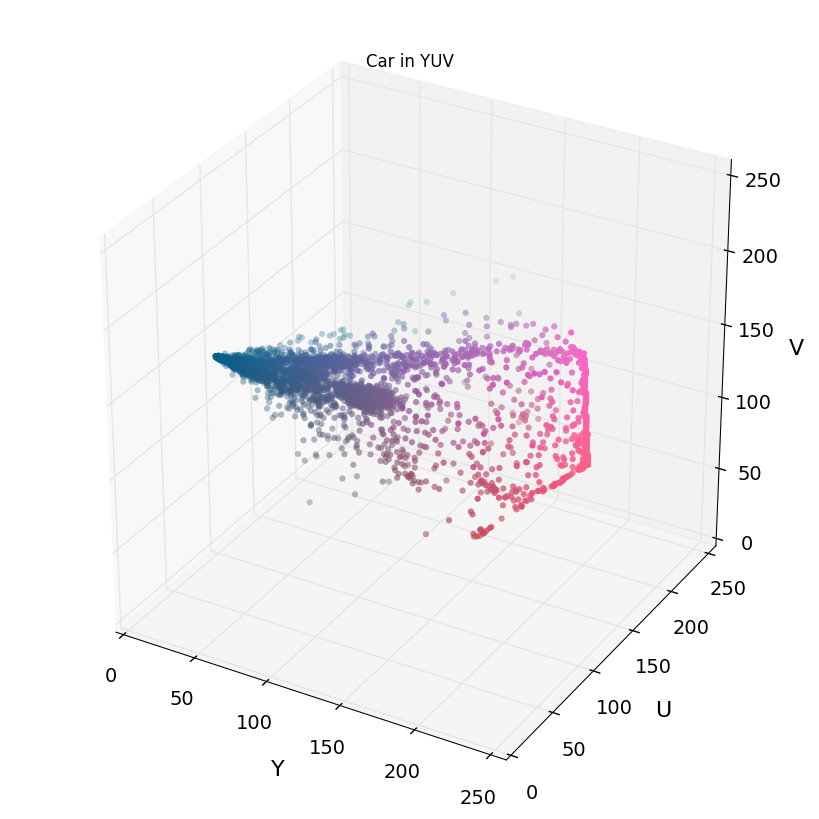

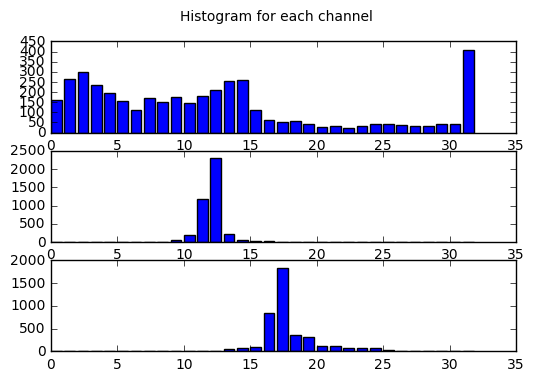

In [13]:
# Car color in LUV
car_LUV = cv2.cvtColor(car, cv2.COLOR_RGB2LUV)
plot3d(car_LUV, "YUV")
plt.title("Car in YUV")
hist_features = color_hist(car_LUV)
hist_feature_plot(hist_features)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f45e8016c18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f45e81e30b8>)

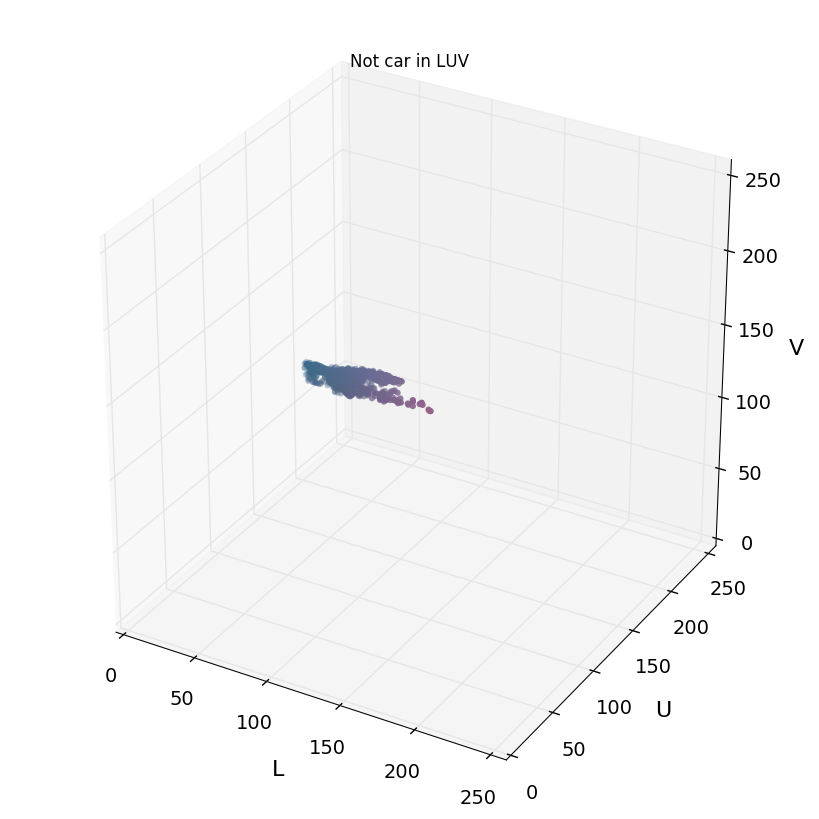

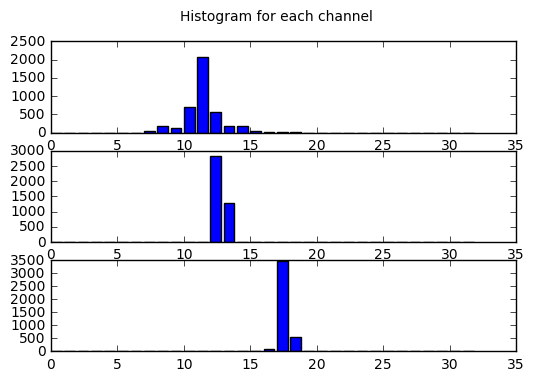

In [14]:
# No Car color in LUV
nocar_LUV = cv2.cvtColor(nocar, cv2.COLOR_RGB2LUV)
plot3d(nocar_LUV, "LUV")
plt.title("Not car in LUV")
hist_features = color_hist(nocar_LUV)
hist_feature_plot(hist_features)

From the above images, both HSV and HLS have better dispersion than RGB. So we will build color features using HLS as a start.

## Gradient Features

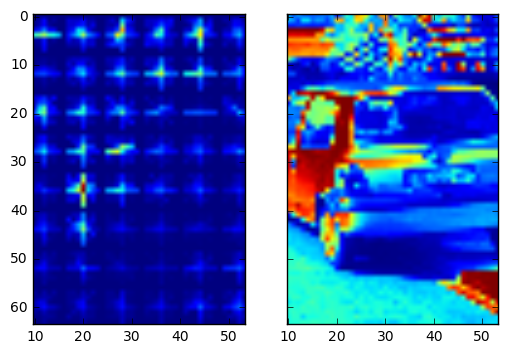

In [15]:
# Tweak these parameters and see how the results change.
orient = 12
pix_per_cell = 8
cell_per_block = 1
hog_channel = 1 # Can be 0, 1, 2

hog_features, hog_image = get_hog_features(car_LUV[:, :, hog_channel],
                                           orient, pix_per_cell,
                                           cell_per_block, vis=True,
                                           feature_vec=True)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(hog_image)
ax2.imshow(car_HLS[:, :, hog_channel])

(96,) (768,)


<Container object of 3936 artists>

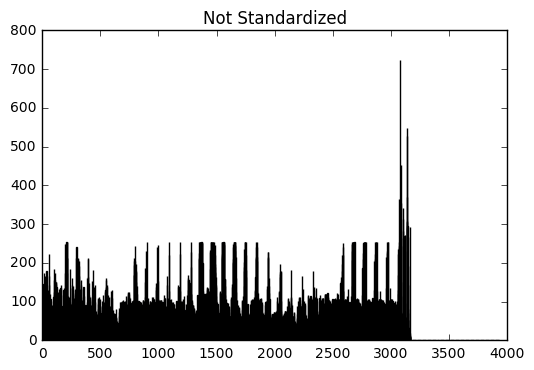

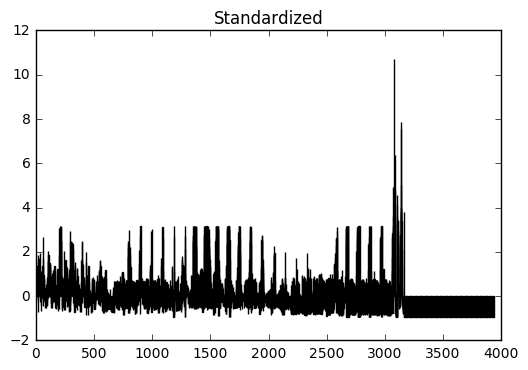

In [20]:
# Car color in HLS
car_HLS = cv2.cvtColor(car, cv2.COLOR_RGB2HLS)
spatial_features = bin_spatial(car_HLS, size=(32, 32))
hist_features = color_hist(car_HLS)
hog_features = get_hog_features(car_HLS[:, :, hog_channel], orient, pix_per_cell, cell_per_block, 
                                vis=False, feature_vec=True)
print(hist_features.shape, hog_features.shape)
features = np.hstack((spatial_features, hist_features, hog_features))
plt.title("Not Standardized")
plt.bar(range(len(features)), features)

from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(features.reshape(-1, 1))
plt.figure()
plt.title("Standardized")
plt.bar(range(len(scaled_features)), scaled_features)

## Building model

In [22]:
import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

def get_image_files():
    car_path = "./data/vehicles/"
    not_car_path = "./data/non-vehicles/"

    car_files = glob.glob(car_path + '/**/*.png', recursive=True)
    y_car = np.ones(len(car_files), dtype=np.int)
    not_car_files = glob.glob(not_car_path + '/**/*.png', recursive=True)
    y_not_car = np.zeros(len(not_car_files), dtype=np.int)

    X = np.concatenate([car_files, not_car_files])
    y = np.concatenate([y_car, y_not_car])
    X_names, y = shuffle(X, y)
    return X_names, y

X_names, y = get_image_files()

In [23]:
print(len(X_names), len(y))

17760 17760


### HOG features

In [24]:
%%time
# Tweak these parameters and see how the results change.
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12
pix_per_cell = 8
cell_per_block = 1
hog_channel = 'ALL' # Can be 0, 1, 2 or "ALL"
X = extract_gradient_features(X_names, 
                     cspace=colorspace,
                     orient=orient,
                     pix_per_cell=pix_per_cell,
                     cell_per_block=cell_per_block,
                     hog_channel=hog_channel)

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

CPU times: user 1min 43s, sys: 504 ms, total: 1min 44s
Wall time: 1min 43s


In [25]:
%%time
svc = LinearSVC()
svc.fit(X_train, y_train)

CPU times: user 1.86 s, sys: 80 ms, total: 1.94 s
Wall time: 1.37 s


In [26]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='binary'))

0.98536036036 0.985792349727


### color features

In [27]:
%%time
# Tweak these parameters and see how the results change.
colorspace = 'HLS' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
spatial_size = (32, 32)
hist_bins = 80
hist_range=(0, 256)

X = extract_color_features(X_names,
                       cspace=colorspace,
                       spatial_size=spatial_size,
                       hist_bins=hist_bins,
                       hist_range=hist_range)

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

CPU times: user 19.1 s, sys: 404 ms, total: 19.5 s
Wall time: 17.4 s


In [28]:
%%time
svc = LinearSVC()
svc.fit(X_train, y_train)

CPU times: user 15.8 s, sys: 84 ms, total: 15.9 s
Wall time: 15.4 s


In [29]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='binary'))

0.944256756757 0.945334069575


### Combine two features

In [31]:
%%time
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12
pix_per_cell = 8
cell_per_block = 1
hog_channel = 'ALL' # Can be 0, 1, 2 or "ALL"

X_gradient = extract_gradient_features(X_names, 
                             cspace=colorspace,
                             orient=orient,
                             pix_per_cell=pix_per_cell,
                             cell_per_block=cell_per_block,
                             hog_channel=hog_channel)
print(X_gradient[0].shape)
colorspace = 'HLS' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
spatial_size = (32, 32)
hist_bins = 100
hist_range=(0, 256)

X_color = extract_color_features(X_names,
                               cspace=colorspace,
                               spatial_size=spatial_size,
                               hist_bins=hist_bins,
                               hist_range=hist_range)
print(X_color[0].shape)
X = np.hstack((X_color, X_gradient))
print(X[0].shape)
X_scaler = StandardScaler().fit(X)
X = X_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

(2304,)
(3372,)
(5676,)
CPU times: user 2min 2s, sys: 1.43 s, total: 2min 3s
Wall time: 2min


In [32]:
%%time
svc = LinearSVC(C=1e-4)
svc.fit(X_train, y_train)

CPU times: user 2.89 s, sys: 232 ms, total: 3.12 s
Wall time: 2.72 s


In [33]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='binary'))

0.993243243243 0.993311036789


Save model

In [34]:
import pickle
with open("svc.pkl", "wb") as f:
    pickle.dump(svc, f)
with open("X_scaler.pkl", "wb") as f:
    pickle.dump(X_scaler, f)

## Sliding window search

Load test image

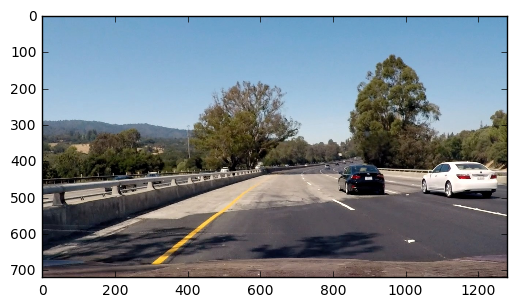

In [3]:
img_file = './test_images/test4.jpg'
test_img = mpimg.imread(img_file)
plt.imshow(test_img)

((1150, 420), (64, 0))


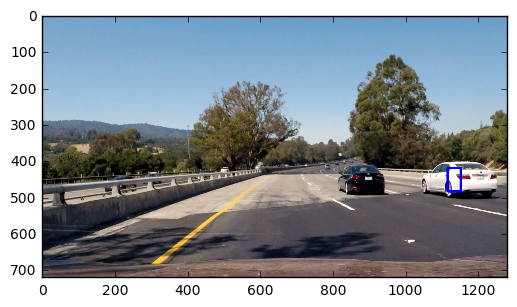

In [4]:
# test scale
bboxes = [((1150, 420), (64, 0)), ((1114, 484), (0, 64))]
print(bboxes[0])
draw_img = draw_boxes(test_img, bboxes)
plt.imshow(draw_img)

Load model and scaler

In [5]:
import pickle
with open("svc.pkl", "rb") as f:
    svc =pickle.load(f)
with open("X_scaler.pkl", "rb") as f:
    X_scaler = pickle.load(f)

slide window search

In [ ]:
ystart = 350
ystop = 656
scale = 1.3

orient = 12
pix_per_cell = 8
cell_per_block = 1

spatial_size = (32, 32)
hist_bins = 100

boxes, draw_img = find_cars(test_img,
                      ystart,
                      ystop,
                      scale,
                      svc,
                      X_scaler,
                      orient,
                      pix_per_cell,
                      cell_per_block,
                      spatial_size,
                      hist_bins,
                      draw=True)
plt.imshow(draw_img)

## Heat map and filtering

In [97]:
heat = np.zeros_like(test_img[:,:,0]).astype(np.float)
scales = np.linspace(0.8, 2.0, 20)
box_list = []
for scale in scales:
    boxes, draw_img = find_cars(test_img,
                                  ystart,
                                  ystop,
                                  scale,
                                  svc,
                                  X_scaler,
                                  orient,
                                  pix_per_cell,
                                  cell_per_block,
                                  spatial_size,
                                  hist_bins)
    if boxes:
        box_list.extend(boxes)

In [98]:
heat = np.zeros_like(test_img[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat = add_heat(heat, box_list)
print(heat.shape)
# Apply threshold to help remove false positives
heat = apply_threshold(heat,5)
# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)
# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(test_img), labels)

(720, 1280)


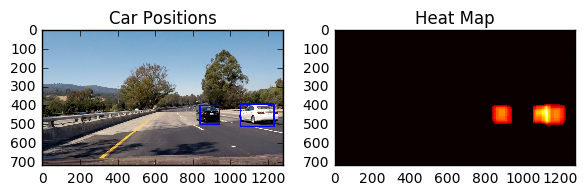

In [101]:
fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()